# Introduction
In this session, we will delve into more advanced visualizations using the Seaborn library and explore complex questions related to a given dataset.

The `seaborn` library is a powerful data visualization library built on top of `matplotlib`, offering a high-level interface for creating visually appealing and informative statistical graphics.

To begin working with `seaborn`, we need to import the library as shown below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

Before we start using the `seaborn` library, we need to load the data that we are using to create visualisations

In [2]:
df = pd.read_csv('carprices.csv', index_col = 'car_ID')
df.head(2)

symboling              carname doornumber      carbody enginelocation  \
car_ID                                                                          
1               3   alfa-romero giulia        two  convertible          front   
2               3  alfa-romero stelvio        two  convertible          front   

        wheelbase  carlength  carwidth  carheight  curbweight cylindernumber  \
car_ID                                                                         
1            88.6      168.8      64.1       48.8        2548           four   
2            88.6      168.8      64.1       48.8        2548           four   

        enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
car_ID                                                                         
1              130       3.47    2.68               9.0         111     5000   
2              130       3.47    2.68               9.0         111     5000   

        citympg  highwaympg    price  
car_ID                                
1            21          27  13495.0  
2            21          27  16500.0

### Quiz
Load the `buffet_details_extended.csv` dataset into a dataframe `qdf`. Use the `'Room'` column as the index. Also load the `AMZN_stocks_data.csv` dataset into a dataframe `amzn`.

In [3]:
qdf = pd.read_csv('buffet_details_extended.csv', index_col = 'Room')
qdf.head(2)

Name  Age Block   Cuisine  Expenditure
Room                                            
A1      Shilpa   18     A    Indian        24.65
A2    Jaspreet   32     A  American        18.54

In [4]:
amzn = pd.read_csv('AMZN_stocks_data.csv')
amzn.head(2)

Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN

# Revisiting some familiar graphs

### Example
Count plot
> How many cars of each car body type are present in the car prices dataset?

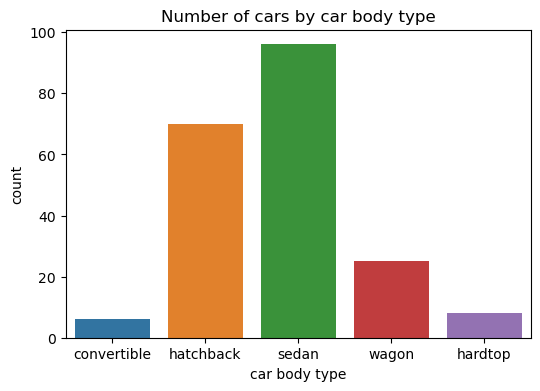

In [5]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'carbody')
plt.title('Number of cars by car body type')
plt.xlabel('car body type')
plt.ylabel('count');

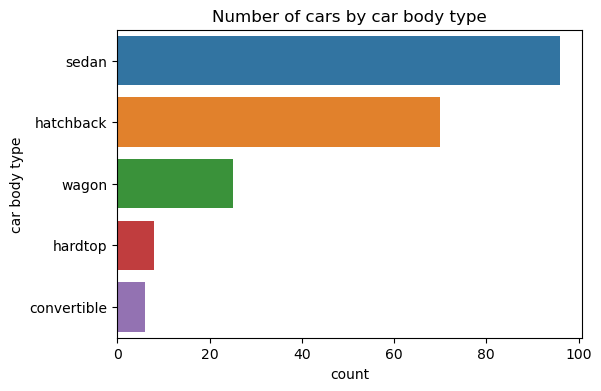

In [6]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, y = 'carbody', order = df['carbody'].value_counts().index)
plt.title('Number of cars by car body type')
plt.xlabel('count')
plt.ylabel('car body type');

### Example
Double countplot
> How is the count of cars distributed across different car body types split over number of doors in the car prices dataset?

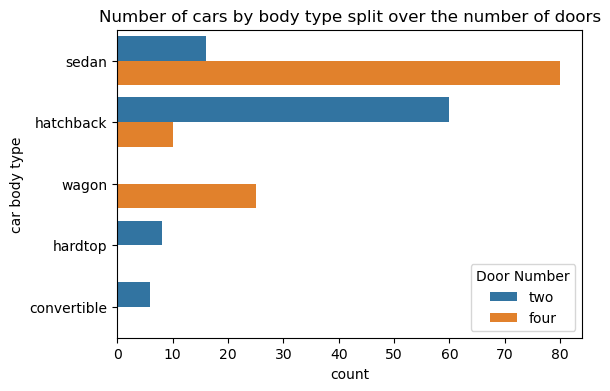

In [7]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, y = 'carbody', hue = 'doornumber', order = df['carbody'].value_counts().index)
plt.title('Number of cars by body type split over the number of doors')
plt.xlabel('count')
plt.ylabel('car body type')
plt.legend(title = 'Door Number');

### Example
Bar graph
> What is the average engine size for each car body type in the car prices dataset?

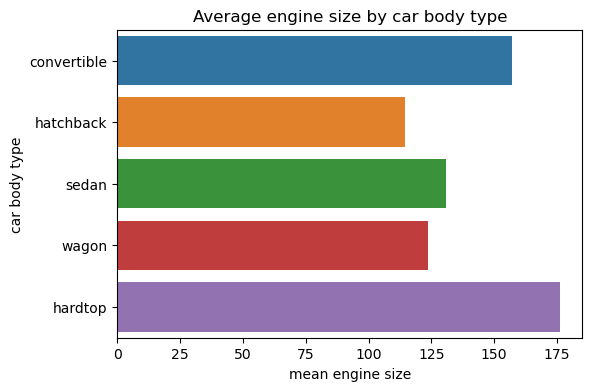

In [8]:
plt.figure(figsize = (6, 4))
sns.barplot(data = df, y = 'carbody', x = 'enginesize', estimator = 'mean', errorbar = None)
plt.xlabel('mean engine size')
plt.ylabel('car body type')
plt.title('Average engine size by car body type');

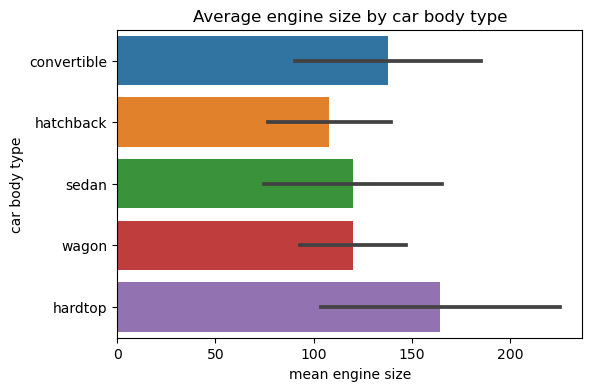

In [9]:
plt.figure(figsize = (6, 4))
sns.barplot(data = df, y = 'carbody', x = 'enginesize', estimator = 'median', errorbar = 'sd')
plt.xlabel('mean engine size')
plt.ylabel('car body type')
plt.title('Average engine size by car body type');

### Example
Grouped bar graph
> How does the engine size vary across different car body categories split over number of doors in the car prices dataset?

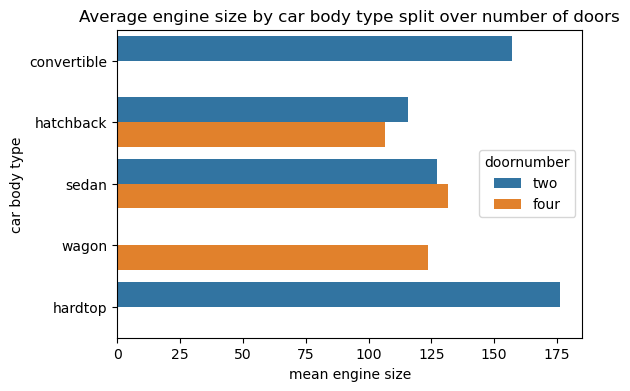

In [10]:
plt.figure(figsize = (6, 4))
bar_plot = sns.barplot(data = df, y = 'carbody', x = 'enginesize', hue = 'doornumber', estimator = 'mean', errorbar = None)
bar_plot.set_xlabel('mean engine size')
bar_plot.set_ylabel('car body type')
bar_plot.set_title('Average engine size by car body type split over number of doors');

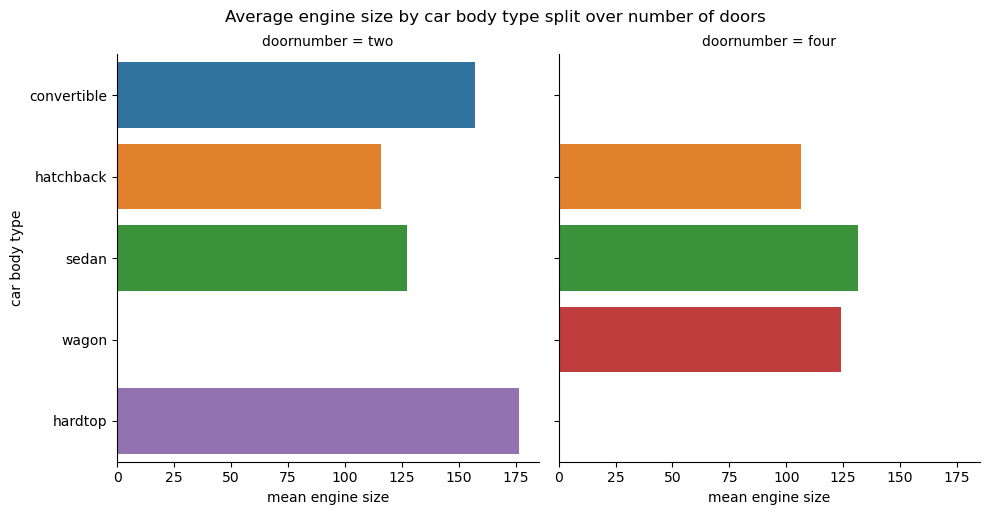

In [11]:
bar_plot = sns.catplot(data = df, kind = 'bar', y = 'carbody', x = 'enginesize', col = 'doornumber', estimator = 'mean', errorbar = None)
bar_plot.set_axis_labels('mean engine size', 'car body type')
bar_plot.fig.suptitle('Average engine size by car body type split over number of doors', y = 1.02);

The syntax is different here because we are editing the facet grid. You can learn more about it [here](https://www.analyticsvidhya.com/blog/2021/07/using-seaborns-facetgrid-based-methods-for-exploratory-data-analysis/).

### Example
Stacked bar graph
> How does engine size vary across different car body categories split over number of doors in the car pices dataset?

In [12]:
pivot_df = df.pivot_table(index = 'carbody', columns = 'doornumber', values = 'enginesize', aggfunc = 'mean', fill_value = 0)
pivot_df

doornumber      four         two
carbody                         
convertible    0.000  157.166667
hardtop        0.000  176.250000
hatchback    106.400  115.733333
sedan        131.525  127.312500
wagon        123.840    0.000000

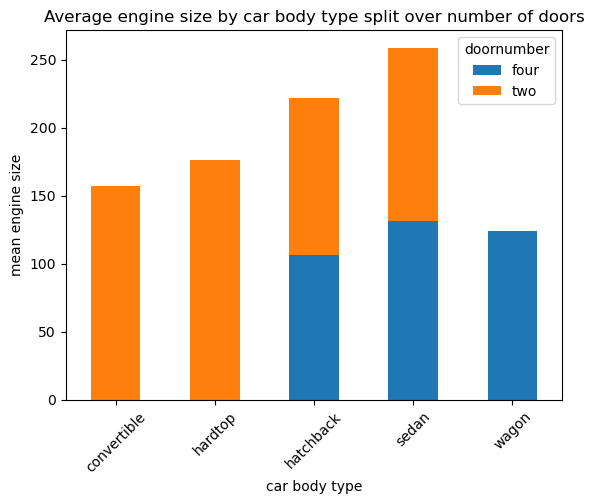

In [13]:
pivot_df.plot(kind = 'bar', stacked = True)
plt.title('Average engine size by car body type split over number of doors')
plt.xlabel('car body type')
plt.xticks(rotation = 45)
plt.ylabel('mean engine size');

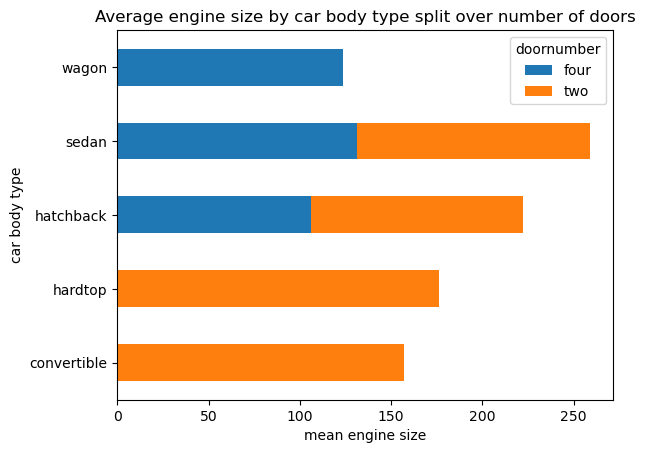

In [14]:
pivot_df.plot(kind = 'barh', stacked = True)
plt.title('Average engine size by car body type split over number of doors')
plt.xlabel('mean engine size')
plt.ylabel('car body type');

### Example
Line plot
> How have the stock prices of Amazon varied over the years as per the data in the AMZN stocks dataset?

In [15]:
amzn = pd.read_csv('AMZN_stocks_data.csv')
amzn.head(2)

Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN

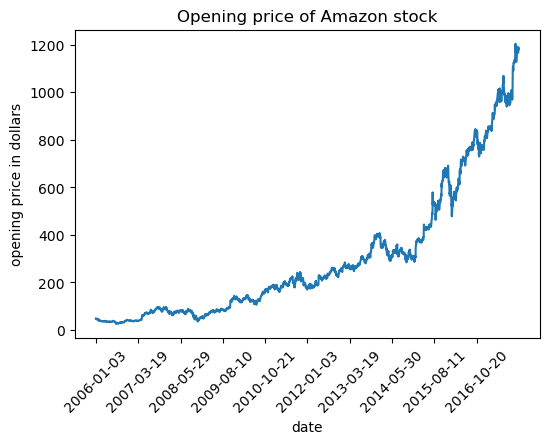

In [16]:
plt.figure(figsize = (6, 4))
sns.lineplot(data = amzn, x = 'Date', y = 'Open')
plt.xlabel('date')
plt.ylabel('opening price in dollars')
plt.title('Opening price of Amazon stock')
plt.xticks(range(0, 3019, 302), rotation = 45);

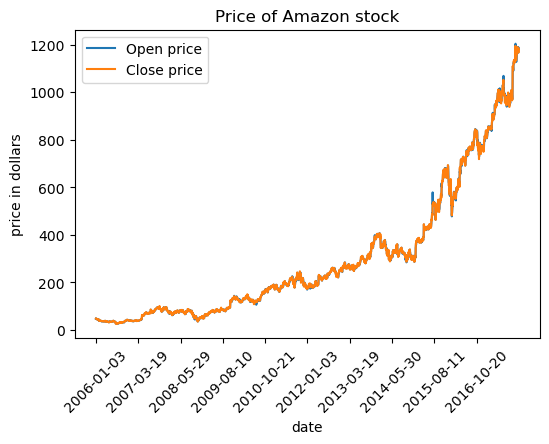

In [17]:
plt.figure(figsize = (6, 4))
sns.lineplot(data = amzn, x = 'Date', y = 'Open', label = 'Open price')
sns.lineplot(data = amzn, x = 'Date', y = 'Close', label = 'Close price')
plt.xlabel('date')
plt.ylabel('price in dollars')
plt.title('Price of Amazon stock')
plt.xticks(range(0, 3019, 302), rotation = 45)
plt.legend();

In [18]:
sub_amzn = amzn[0:100]

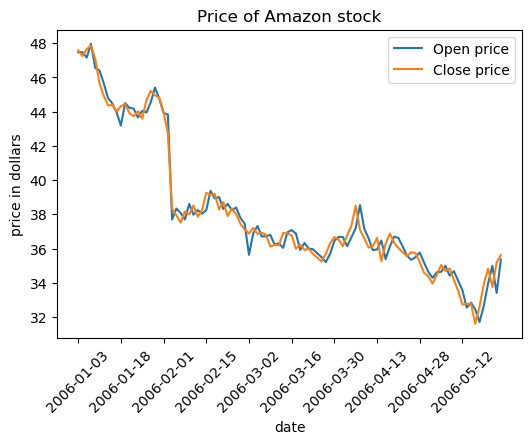

In [19]:
plt.figure(figsize = (6, 4))
sns.lineplot(data = sub_amzn, x = 'Date', y = 'Open', label = 'Open price')
sns.lineplot(data = sub_amzn, x = 'Date', y = 'Close', label = 'Close price')
plt.xlabel('date')
plt.ylabel('price in dollars')
plt.title('Price of Amazon stock')
plt.xticks(range(0, 100, 10), rotation = 45)
plt.legend();

### Example
Histogram
> What is the distribution of car prices in the car prices dataset?

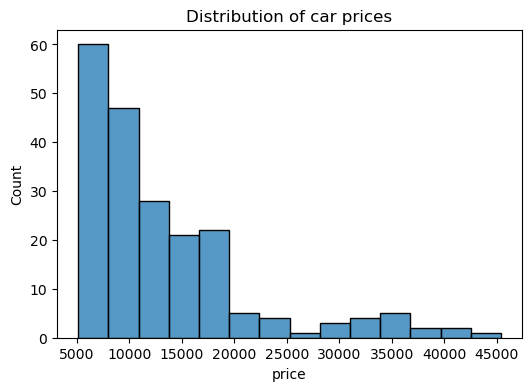

In [20]:
plt.figure(figsize = (6, 4))
sns.histplot(data = df, x = 'price')
plt.title('Distribution of car prices');

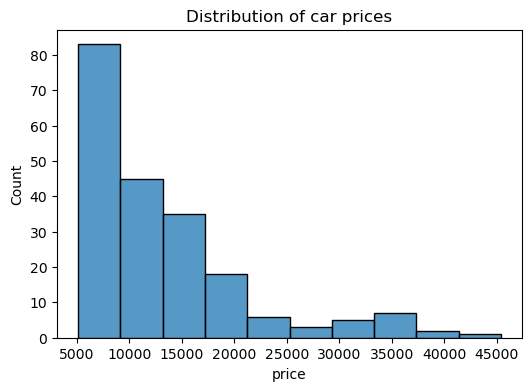

In [21]:
plt.figure(figsize = (6, 4))
sns.histplot(data = df, x = 'price', bins = 10)
plt.title('Distribution of car prices');

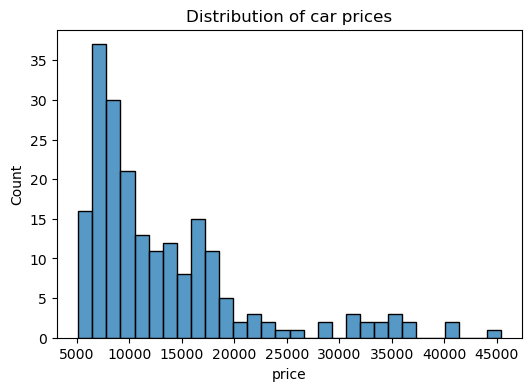

In [22]:
plt.figure(figsize = (6, 4))
sns.histplot(data = df, x = 'price', bins = 30)
plt.title('Distribution of car prices');

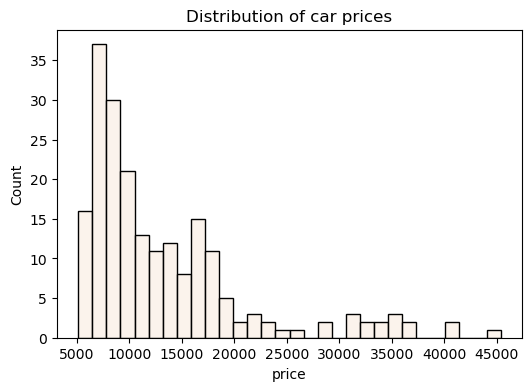

In [23]:
plt.figure(figsize = (6, 4))
sns.histplot(data = df, x = 'price', bins = 30, color = 'linen')
plt.title('Distribution of car prices');

### Example
Stacked histogram
> What is the distribution of prices for cars split over car body type in the car prices dataset?

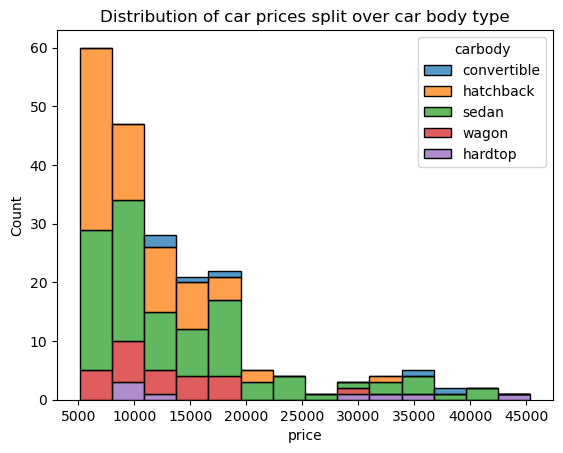

In [24]:
sns.histplot(data = df, x = 'price', hue = 'carbody', multiple = 'stack')
plt.title('Distribution of car prices split over car body type');

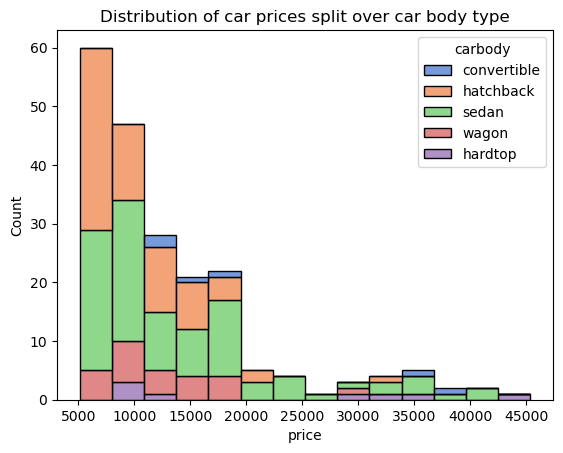

In [25]:
sns.histplot(data = df, x = 'price', hue = 'carbody', multiple = 'stack', palette = 'muted')
plt.title('Distribution of car prices split over car body type');

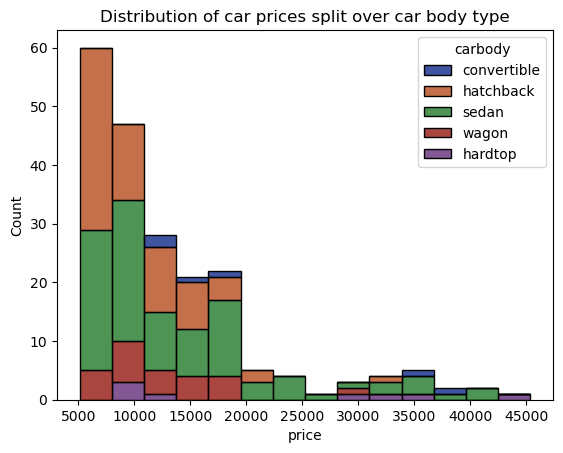

In [26]:
sns.histplot(data = df, x = 'price', hue = 'carbody', multiple = 'stack', palette = 'dark')
plt.title('Distribution of car prices split over car body type');

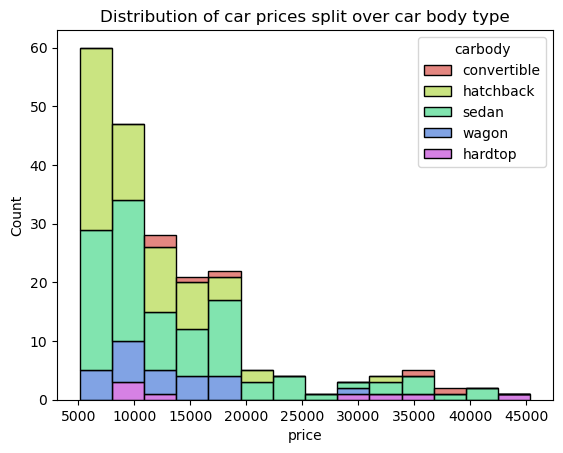

In [27]:
sns.histplot(data = df, x = 'price', hue = 'carbody', multiple = 'stack', palette = 'hls')
plt.title('Distribution of car prices split over car body type');

### Quiz
Create a grouped bar graph to answer the following question pertaining to the `qdf` dataframe:
> What is the relationship between cuisine and expenditure split by the block in which the guest lives?

Try using the `hue` and `estimator` parameters of the `barplot` method

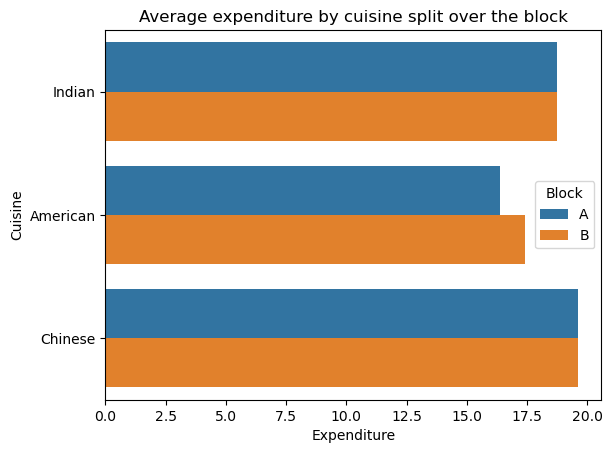

In [28]:
sns.barplot(data = qdf, y = 'Cuisine', x = 'Expenditure', hue = 'Block', estimator = 'mean', errorbar = None)
plt.title('Average expenditure by cuisine split over the block');

# Box plots
A box plot, also known as a box-and-whisker plot, is a statistical visualization tool that provides a summary of the distribution of a dataset. It displays the central tendency, spread, and identifies potential outliers. Here's a breakdown of the components of a box plot:

- **Box (Interquartile range or IQR)**: The box represents the interquartile range, which is the range between the first quartile (Q1) and the third quartile (Q3). The length of the box signifies the spread of the middle 50% of the data.

- **Line inside the box (Median)**: A line inside the box represents the median (Q2), which is the middle value of the dataset when it is sorted in ascending order.

- **Whiskers**: Whiskers extend from the box to the minimum and maximum values within a specified range (usually 1.5 times the IQR). They show the spread of the entire dataset.

- **Outliers**: Individual points beyond the whiskers are considered outliers. They are potential data points that fall significantly outside the overall distribution.

### Example
Quantiles: In pandas, quantiles can be computed using the `quantile()` method, which provides a way to divide a dataset into intervals based on the distribution of the data. Quantiles are points in a dataset that correspond to certain probabilities. The `describe()` method gives you quartiles by default.
> What is the distribution of city mileage of cars in the car prices dataset?

In [29]:
median_value = df['citympg'].median()
median_value

24.0

In [30]:
df['citympg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

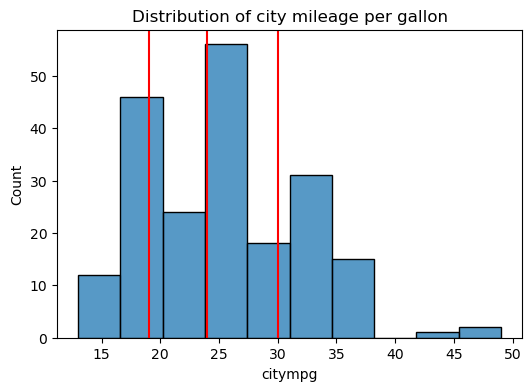

In [31]:
plt.figure(figsize = (6, 4))
sns.histplot(data = df, x = 'citympg', bins = 10)
plt.title('Distribution of city mileage per gallon')
plt.axvline(19, c = 'r')
plt.axvline(24, c = 'r')
plt.axvline(30, c = 'r');

### Example
Box plots for a single numerical variable
> What is the distribution of city mileage per gallon (citympg) in the dataset?

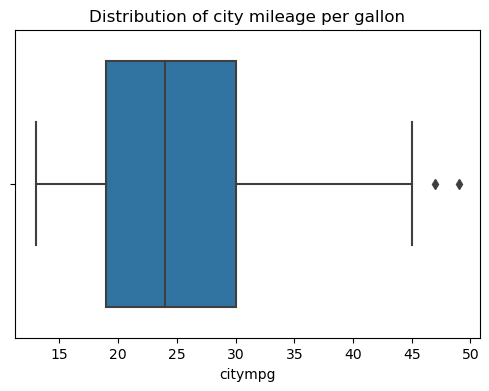

In [32]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'citympg')
plt.title('Distribution of city mileage per gallon');

### Example
Box plots for numerical variable split by categorical variable
> What is the distribution of city mileage per gallon for cars split over car body type?

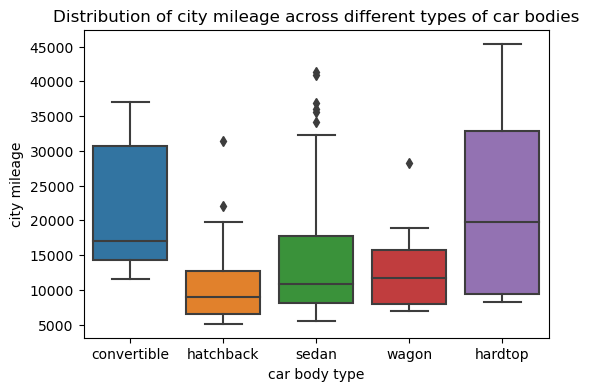

In [33]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'carbody', y = 'price')
plt.title('Distribution of city mileage across different types of car bodies')
plt.xlabel('car body type')
plt.ylabel('city mileage');

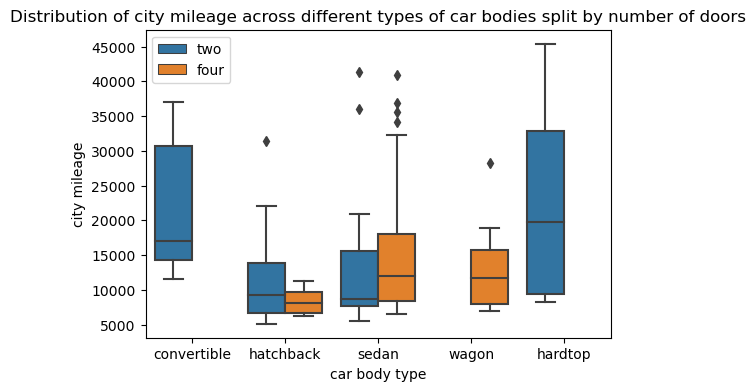

In [34]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'carbody', y = 'price', hue = 'doornumber')
plt.title('Distribution of city mileage across different types of car bodies split by number of doors')
plt.xlabel('car body type')
plt.ylabel('city mileage')
plt.legend(loc = 'best');

### Quiz
Use a box plot to answer the following question pertaining to the `qdf` dataframe:
> What is the distribution of expenditure split over cuisine?

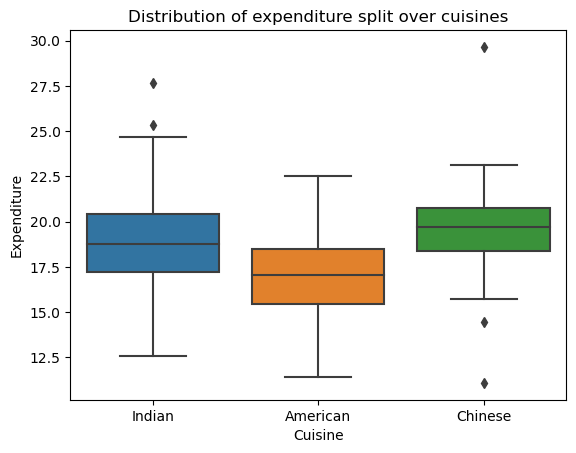

In [35]:
sns.boxplot(data = qdf, x = 'Cuisine', y = 'Expenditure')
plt.title('Distribution of expenditure split over cuisines');

# Kernel density estimation (KDE) plots
The KDE plot is a smooth and continuous estimate of a histogram of a numerical variable. The Y-axis represents the probability density instead of the frequency of the X-value.

### Example
KDE plots can complement histograms by providing a continuous overview of the distribution, while histograms offer a discrete representation
> What is the distribution of horsepower in the dataset?

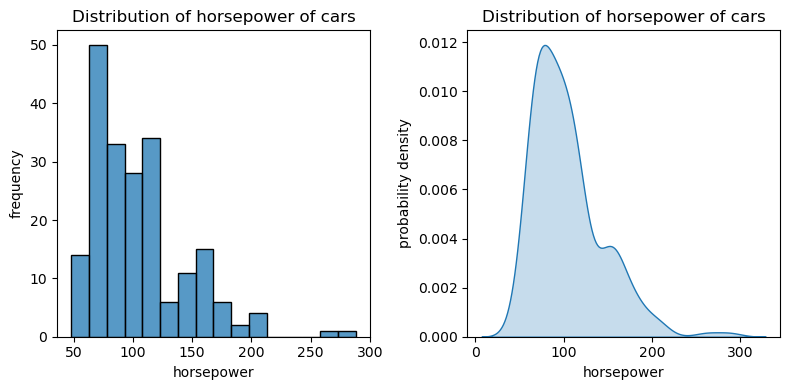

In [36]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'horsepower')
plt.title('Distribution of horsepower of cars', fontsize = 12)
plt.xlabel('horsepower', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.subplot(1, 2, 2)
sns.kdeplot(data = df, x = 'horsepower', fill = True)
plt.title('Distribution of horsepower of cars', fontsize = 12)
plt.xlabel('horsepower', fontsize = 10)
plt.ylabel('probability density', fontsize = 10)
plt.tight_layout();

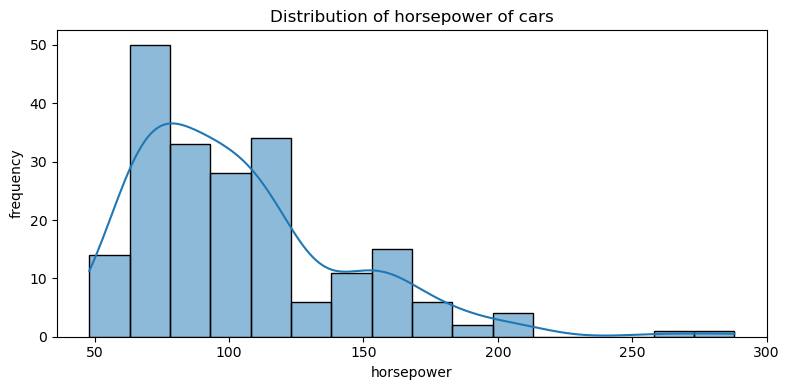

In [37]:
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'horsepower', kde = True)
plt.title('Distribution of horsepower of cars', fontsize = 12)
plt.xlabel('horsepower', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.tight_layout();

### Quiz
Use a histogram with a KDE plot on top of it to answer the following question pertaining to the `qdf` dataframe:
> What is the distribution of expenditure values?

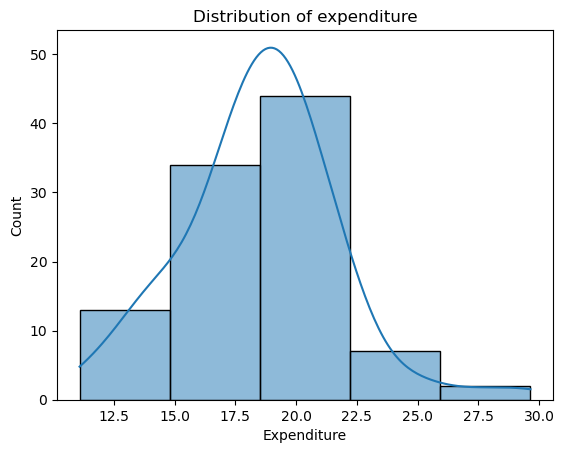

In [38]:
sns.histplot(data = qdf, x = 'Expenditure', bins = 5, kde = True)
plt.title('Distribution of expenditure');

# Heat maps
Heat maps are visualizations that map numerical scales to color scales. This helps in visualizing areas of larger numerical values and smaller numerical values. One of the most common metric that is visualized using a heat map is the correlation coefficient.

### Example
Correlation: It is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. It is commonly expressed as the correlation coefficient, which ranges from -1 to 1. Values closer to 0 indicate weak relationships while values farther away from 0 indicate stronger relationships. A negative value indicates an inverse relationship while a positive value indicates a direct relationship.

In [39]:
df_num_sub = df[['curbweight', 'horsepower', 'citympg', 'highwaympg', 'price']]
df_num_sub.head(2)

curbweight  horsepower  citympg  highwaympg    price
car_ID                                                      
1             2548         111       21          27  13495.0
2             2548         111       21          27  16500.0

In [40]:
df_num_sub = df_num_sub.convert_dtypes()
df_num_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   curbweight  205 non-null    Int64  
 1   horsepower  205 non-null    Int64  
 2   citympg     205 non-null    Int64  
 3   highwaympg  205 non-null    Int64  
 4   price       205 non-null    Float64
dtypes: Float64(1), Int64(4)
memory usage: 10.6 KB


In [41]:
corr_mat = df_num_sub.corr()
corr_mat

curbweight  horsepower   citympg  highwaympg     price
curbweight    1.000000    0.750739 -0.757414   -0.797465  0.835305
horsepower    0.750739    1.000000 -0.801456   -0.770544  0.808139
citympg      -0.757414   -0.801456  1.000000    0.971337 -0.685751
highwaympg   -0.797465   -0.770544  0.971337    1.000000 -0.697599
price         0.835305    0.808139 -0.685751   -0.697599  1.000000

In [42]:
corr_mat.round(2)

curbweight  horsepower  citympg  highwaympg  price
curbweight        1.00        0.75    -0.76       -0.80   0.84
horsepower        0.75        1.00    -0.80       -0.77   0.81
citympg          -0.76       -0.80     1.00        0.97  -0.69
highwaympg       -0.80       -0.77     0.97        1.00  -0.70
price             0.84        0.81    -0.69       -0.70   1.00

### Example
Heat map
> Is there any correlation between numerical variables in the car prices dataset?

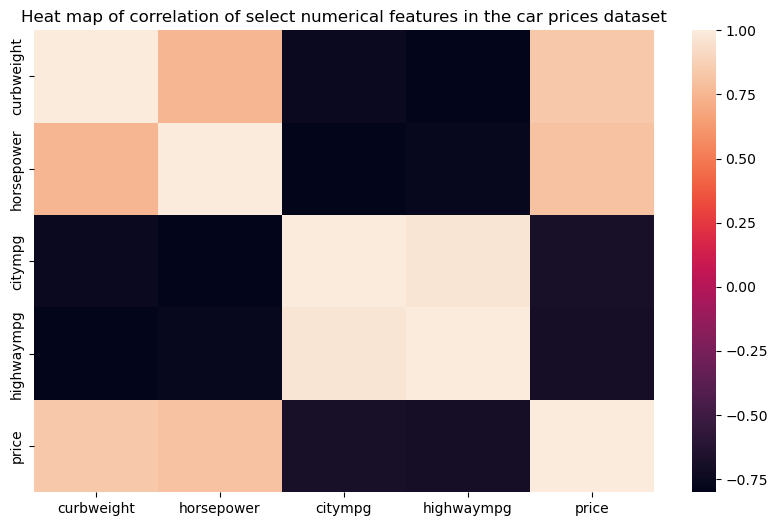

In [43]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = corr_mat)
plt.title('Heat map of correlation of select numerical features in the car prices dataset');

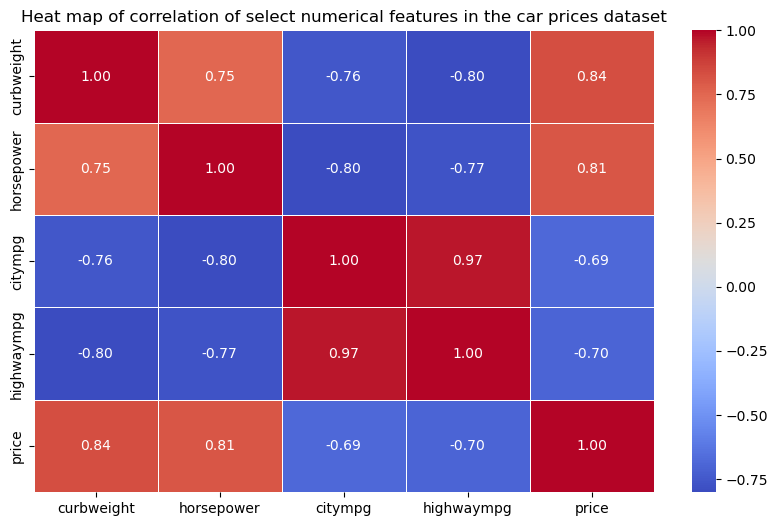

In [44]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = corr_mat, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Heat map of correlation of select numerical features in the car prices dataset');

### Quiz
Use a heatmap to answer the following question pertaining to the `df` dataframe:
> What is the correlation between car weight, engine size, horsepower and price?

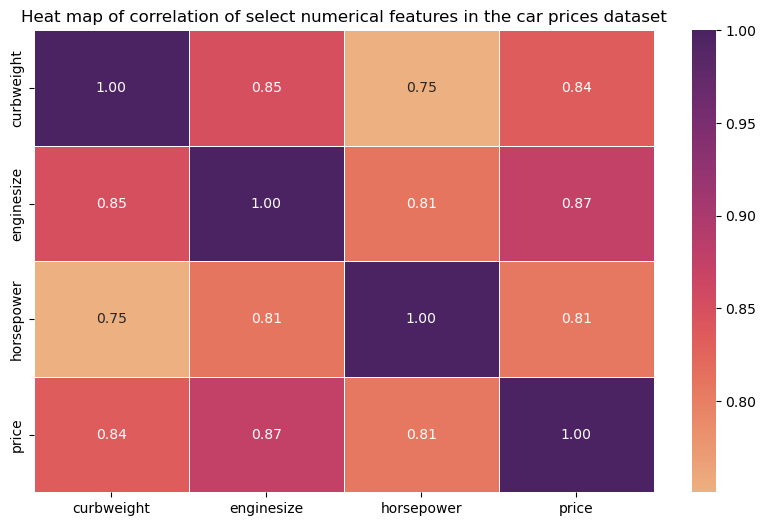

In [45]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df[['curbweight', 'enginesize', 'horsepower', 'price']].corr(), annot = True, cmap = 'flare', fmt = '.2f', linewidths = 0.5)
plt.title('Heat map of correlation of select numerical features in the car prices dataset');

# Pair plot
A pair plot is a collection of plots arranged in a tabular fashion. Each plot is a visualization between two numerical variables, one from the X-axis and one from the Y-axis. If both variables are different, you will get a scatter plot. If they are the same, you will get a histogram. Pair plots are used to quickly analyze numerical variables in datasets.

### Example
Pair plot
> Study the numerical features curb weight, horsepower, city mileage, highway mileage, and price in the car prices dataset.

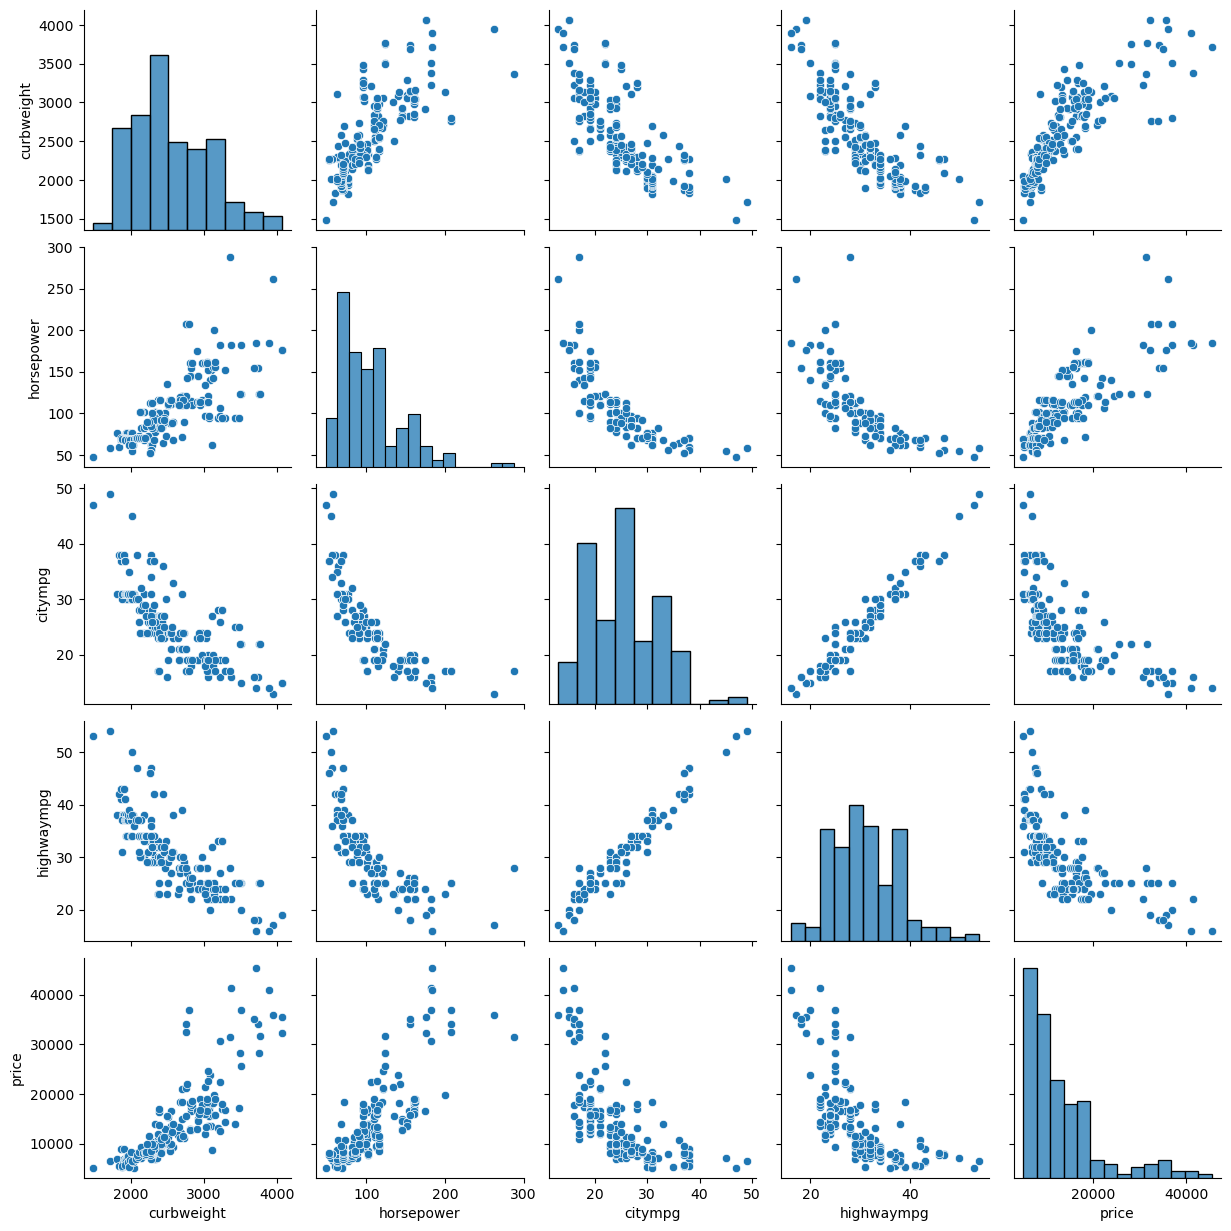

In [46]:
sns.pairplot(df[['curbweight', 'horsepower', 'citympg', 'highwaympg', 'price']]);

### Quiz
Use a pair plot to answer the following question pertaining to the `qdf` dataframe:
> How are the numerical variables in the buffet details dataset distributed?

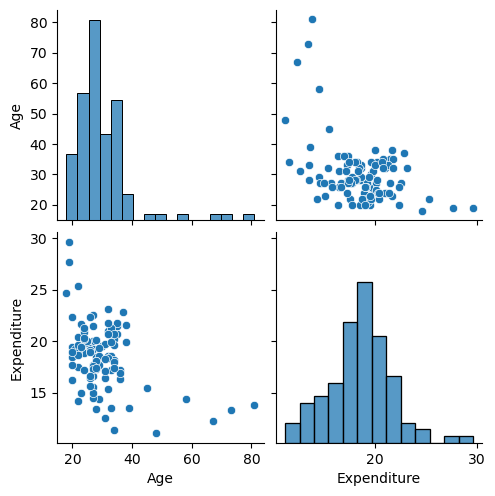

In [47]:
sns.pairplot(qdf);